# Exercise 6.2 Exporatory Analysis
Comparing python visualization libraries to conduct some expoloratory analysis between variables in the data set

## To Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

## To Import Data

In [2]:
# To check the version of matplot library I have
matplotlib.__version__

'3.7.0'

In [3]:
# To Define path 
path = r'/Users/oluwaseunodusanya/Desktop/23.07.2023_Germany Apartment Rental Offer Analysis'

In [4]:
# To import Data
df_rental = pd.read_pickle(os.path.join(path, '02 Data','02 Prepared Data','apartment_rental_data.pkl'))

In [5]:
# To call the imported data
df_rental.head()

state  service charge                    heating type  \
0  Nordrhein_Westfalen          245.00                 central_heating   
1      Rheinland_Pfalz          134.00  self_contained_central_heating   
2              Sachsen          255.00                   floor_heating   
3              Sachsen           58.15                district_heating   
4               Bremen          138.00  self_contained_central_heating   

  telekom tv offer  telekom hybrid upload speed  newly constructed  balcony  \
0    ONE_YEAR_FREE                          NaN              False    False   
1    ONE_YEAR_FREE                          NaN              False     True   
2    ONE_YEAR_FREE                         10.0               True     True   
3    ONE_YEAR_FREE                          NaN              False     True   
4              NaN                          NaN              False     True   

   picture count  telekom upload speed  total rent  ...  postal code  \
0              6                  10.0       840.0  ...        44269   
1              8                  10.0         NaN  ...        67459   
2              8                   2.4      1300.0  ...         1097   
3              9                  40.0         NaN  ...         9599   
4             19                   NaN       903.0  ...        28213   

   number of rooms thermalChar  floor  garden  livingSpaceRange  \
0              4.0       181.4    1.0    True                 4   
1              3.0         NaN    NaN   False                 4   
2              3.0         NaN    3.0   False                 4   
3              3.0        86.0    3.0   False                 2   
4              3.0       188.9    1.0   False                 4   

                    city/town lastRefurbish electricityBasePrice  \
0                     Schüren           NaN                  NaN   
1              Böhl_Iggelheim        2019.0                  NaN   
2  Äußere_Neustadt_Antonstadt           NaN                  NaN   
3                    Freiberg           NaN                  NaN   
4           Neu_Schwachhausen           NaN                  NaN   

  electricityKwhPrice  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN  

[5 rows x 33 columns]

In [6]:
df_rental.rename(columns = {'firingTypes' : 'energy source', 'thermalChar': 'energy need'}, inplace = True)

In [7]:
# To remove additional columns not relevant to this analysis
df_rental = df_rental.drop(columns = ['telekom hybrid upload speed', 'postal code', 'geo_krs', 'electricityKwhPrice'])

In [8]:
df_rental.columns

Index(['state', 'service charge', 'heating type', 'telekom tv offer',
       'newly constructed', 'balcony', 'picture count', 'telekom upload speed',
       'total rent', 'year constructed', 'parking spaces', 'energy source',
       'kitchen', 'cellar', 'base rent', 'living space', 'condition of flat',
       'interior qual', 'pets allowed', 'lift', 'type of flat',
       'number of rooms', 'energy need', 'floor', 'garden', 'livingSpaceRange',
       'city/town', 'lastRefurbish', 'electricityBasePrice'],
      dtype='object')

In [9]:
# To print the frequency of variables
df_rental['service charge'].value_counts(dropna = False)

150.00    14156
100.00    12864
200.00    11043
120.00    10521
130.00     7396
          ...  
234.81        1
9.00          1
532.75        1
170.44        1
112.13        1
Name: service charge, Length: 12267, dtype: int64

In [10]:
df_rental['base rent'].value_counts(dropna = False)

350.00     3738
450.00     3528
300.00     3101
400.00     2966
650.00     2884
           ... 
1591.92       1
417.64        1
372.77        1
812.60        1
1255.38       1
Name: base rent, Length: 26659, dtype: int64

In [11]:
df_rental['total rent'].value_counts(dropna = False)

NaN        40017
500.00      1878
450.00      1863
600.00      1792
550.00      1654
           ...  
267.26         1
910.08         1
613.34         1
877.53         1
1479.64        1
Name: total rent, Length: 28487, dtype: int64

In [12]:
# To explore data summary statistics
df_rental.describe()

service charge  picture count  telekom upload speed    total rent  \
count   258613.000000  265436.000000         232578.000000  2.254190e+05   
mean       151.387471       9.779465             28.776669  9.028414e+02   
std        310.079103       6.396722             16.347186  3.345241e+04   
min          0.000000       0.000000              1.000000  0.000000e+00   
25%         95.000000       6.000000             10.000000  4.700000e+02   
50%        135.000000       9.000000             40.000000  6.500000e+02   
75%        190.000000      13.000000             40.000000  9.850000e+02   
max     146118.000000     121.000000            100.000000  1.575154e+07   

       year constructed  parking spaces     base rent   living space  \
count     209096.000000    92205.000000  2.654360e+05  265436.000000   
mean        1966.372437        1.328062  6.948404e+02      74.414782   
std           47.021976        8.395155  1.966115e+04     256.365862   
min         1000.000000        0.000000  0.000000e+00       0.000000   
25%         1950.000000        1.000000  3.390000e+02      54.000000   
50%         1972.000000        1.000000  4.900000e+02      67.420000   
75%         1996.000000        1.000000  7.990000e+02      87.000000   
max         2090.000000     2241.000000  9.999999e+06  111111.000000   

       number of rooms    energy need          floor  livingSpaceRange  \
count    265436.000000  160177.000000  214819.000000     265436.000000   
mean          2.642510     114.842813       2.118556          3.072790   
std           2.648056      61.603730       3.652610          1.407153   
min           1.000000       0.100000      -1.000000          1.000000   
25%           2.000000      79.000000       1.000000          2.000000   
50%           3.000000     107.000000       2.000000          3.000000   
75%           3.000000     140.600000       3.000000          4.000000   
max         999.990000    1996.000000     999.000000          7.000000   

       lastRefurbish  electricityBasePrice  
count   79678.000000          46597.000000  
mean     2013.932692             89.118504  
std        10.977615              5.388528  
min      1015.000000             71.430000  
25%      2012.000000             90.760000  
50%      2017.000000             90.760000  
75%      2019.000000             90.760000  
max      2919.000000             90.760000

#### As we can see some columns have outliers by looking at the mean and max values. service charge column for example has a mean value of 151 and max value of 146118, this indocates the max value is an outlier. This also goes for picture count, telekom upload speed, total rent, base rent, living space, number of rooms, energy need, and floor

In [16]:
# To print data type of variables
df_rental.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 265436 entries, 0 to 268849
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   state                 265436 non-null  object 
 1   service charge        258613 non-null  float64
 2   heating type          221252 non-null  object 
 3   telekom tv offer      233315 non-null  object 
 4   newly constructed     265436 non-null  bool   
 5   balcony               265436 non-null  bool   
 6   picture count         265436 non-null  int64  
 7   telekom upload speed  232578 non-null  float64
 8   total rent            225419 non-null  float64
 9   year constructed      209096 non-null  float64
 10  parking spaces        265436 non-null  object 
 11  energy source         209344 non-null  object 
 12  kitchen               265436 non-null  bool   
 13  cellar                265436 non-null  bool   
 14  base rent             265436 non-null  float64
 15  

In [14]:
# Changing a Variable's Data type
df_rental['parking spaces'] = df_rental['parking spaces'].astype('str')

In [15]:
# To drop additional irrelevant columns
df_rental = df_rental.drop(columns = ['livingSpaceRange'])

<Axes: ylabel='Frequency'>

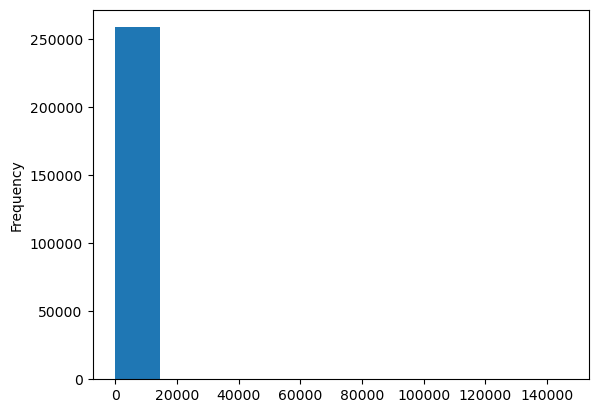

In [17]:
# To identify outliers in variables using histogram to see data distribution, service charge for e.g
df_rental['service charge'].plot.hist()

In [18]:
# To identify outliers using statistical method
def find_outliers_IQR(df_rental):

    q1=df_rental.quantile(0.25)

    q3=df_rental.quantile(0.75)

    IQR=q3-q1

    outliers = df_rental[((df_rental<(q1-1.5*IQR)) | (df_rental>(q3+1.5*IQR)))]

    return outliers

In [19]:
# To print outliers for service charge
outliers = find_outliers_IQR(df_rental['service charge'])

print('number of outliers: '+ str(len(outliers)))

print('max outlier value: '+ str(outliers.max()))

print('min outlier value: '+ str(outliers.min()))

outliers


number of outliers: 8679
max outlier value: 146118.0
min outlier value: 333.0


22         346.0
96         450.0
115        340.0
165        370.0
182        370.0
           ...  
268606    1100.0
268644     342.0
268714     350.0
268771     450.0
268806     400.0
Name: service charge, Length: 8679, dtype: float64

In [20]:
# To pass other columns through the outlier check
outliers_all = find_outliers_IQR(df_rental[['service charge','picture count', 'telekom upload speed', 'total rent', 'year constructed', 'base rent', 'living space', 'number of rooms', 'energy need']])

outliers_all

service charge  picture count  telekom upload speed  total rent  \
0                  NaN            NaN                   NaN         NaN   
1                  NaN            NaN                   NaN         NaN   
2                  NaN            NaN                   NaN         NaN   
3                  NaN            NaN                   NaN         NaN   
4                  NaN            NaN                   NaN         NaN   
...                ...            ...                   ...         ...   
268845             NaN            NaN                   NaN         NaN   
268846             NaN            NaN                   NaN         NaN   
268847             NaN            NaN                   NaN         NaN   
268848             NaN            NaN                   NaN         NaN   
268849             NaN            NaN                   NaN         NaN   

        year constructed  base rent  living space  number of rooms  \
0                    NaN        NaN           NaN              NaN   
1                 1871.0        NaN           NaN              NaN   
2                    NaN        NaN           NaN              NaN   
3                    NaN        NaN           NaN              NaN   
4                    NaN        NaN           NaN              NaN   
...                  ...        ...           ...              ...   
268845               NaN        NaN           NaN              NaN   
268846               NaN        NaN           NaN              NaN   
268847               NaN        NaN           NaN              NaN   
268848               NaN        NaN           NaN              NaN   
268849               NaN        NaN           NaN              NaN   

        energy need  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN  
...             ...  
268845          NaN  
268846          NaN  
268847          NaN  
268848          NaN  
268849          NaN  

[265436 rows x 9 columns]

In [21]:
# To address outliers by replacing outliers using imputation as if they were missing values

def impute_outliers_IQR(df_rental):

    q1=df_rental.quantile(0.25)

    q3=df_rental.quantile(0.75)

    IQR=q3-q1

    upper = df_rental[~(df_rental>(q3+1.5*IQR))].max()

    lower = df_rental[~(df_rental<(q1-1.5*IQR))].min()

    df_rental = np.where(df_rental > upper,

       df_rental.mean(),

       np.where(df_rental < lower, df_rental.mean(), df_rental))

    return df_rental

In [22]:
# To impute the service charge column
df_rental['service charge'] = impute_outliers_IQR(df_rental['service charge'])

df_rental.describe()['service charge']

count    258613.000000
mean        140.941028
std          63.893851
min           0.000000
25%          95.000000
50%         135.000000
75%         180.000000
max         332.500000
Name: service charge, dtype: float64

In [23]:
# To impute the picture count column
df_rental['picture count'] = impute_outliers_IQR(df_rental['picture count'])

df_rental.describe()['picture count']

count    265436.000000
mean          9.086213
std           4.937659
min           0.000000
25%           6.000000
50%           9.000000
75%          12.000000
max          23.000000
Name: picture count, dtype: float64

In [24]:
# To impute the telekom upload speed column
df_rental['telekom upload speed'] = impute_outliers_IQR(df_rental['telekom upload speed'])

df_rental.describe()['telekom upload speed']

count    232578.000000
mean         28.733490
std          16.252793
min           1.000000
25%          10.000000
50%          40.000000
75%          40.000000
max          40.000000
Name: telekom upload speed, dtype: float64

In [25]:
# To impute the total rent column
df_rental['total rent'] = impute_outliers_IQR(df_rental['total rent'])

df_rental.describe()['total rent']

count    225419.000000
mean        731.634489
std         337.354578
min           0.000000
25%         470.000000
50%         650.000000
75%         902.841375
max        1757.500000
Name: total rent, dtype: float64

In [26]:
# To impute the base rent column
df_rental['base rent'] = impute_outliers_IQR(df_rental['base rent'])

df_rental.describe()['base rent']

count    265436.000000
mean        569.711913
std         294.386078
min           0.000000
25%         339.000000
50%         490.000000
75%         708.000000
max        1489.000000
Name: base rent, dtype: float64

In [27]:
# To impute the living space column
df_rental['living space'] = impute_outliers_IQR(df_rental['living space'])

df_rental.describe()['living space']

count    265436.000000
mean         69.544156
std          23.620279
min           5.000000
25%          54.000000
50%          67.480000
75%          82.550000
max         136.500000
Name: living space, dtype: float64

In [28]:
# To impute the number of rooms column
df_rental['number of rooms'] = impute_outliers_IQR(df_rental['number of rooms'])

df_rental.describe()['number of rooms']

count    265436.000000
mean          2.546333
std           0.841802
min           1.000000
25%           2.000000
50%           2.642510
75%           3.000000
max           4.500000
Name: number of rooms, dtype: float64

In [29]:
# To impute the energy need column
df_rental['energy need'] = impute_outliers_IQR(df_rental['energy need'])

df_rental.describe()['energy need']

count    160177.000000
mean        109.400347
std          43.456175
min           0.100000
25%          79.000000
50%         107.000000
75%         135.800000
max         233.000000
Name: energy need, dtype: float64

In [30]:
# To impute the year constructed column
df_rental['year constructed'] = impute_outliers_IQR(df_rental['year constructed'])

df_rental.describe()['year constructed']

count    209096.000000
mean       1969.034518
std          36.833498
min        1881.000000
25%        1952.000000
50%        1972.000000
75%        1996.000000
max        2029.000000
Name: year constructed, dtype: float64

# To create correlation matrix heatmap 

In [31]:
df_rental.corr()

/var/folders/l2/7rhjv6b94rxchmxgsmwrbhr80000gn/T/ipykernel_11443/1634427005.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_rental.corr()


service charge  newly constructed   balcony  \
service charge              1.000000           0.189266  0.232046   
newly constructed           0.189266           1.000000  0.148188   
balcony                     0.232046           0.148188  1.000000   
picture count               0.184374           0.016993  0.107958   
telekom upload speed        0.021378           0.023015  0.013548   
total rent                  0.585185           0.299529  0.300899   
year constructed            0.181079           0.447560  0.309291   
kitchen                     0.107851           0.042039  0.076350   
cellar                      0.075538          -0.003626  0.174818   
base rent                   0.530103           0.310780  0.281517   
living space                0.590218           0.168127  0.257443   
lift                        0.228579           0.323670  0.214753   
number of rooms             0.430739           0.078510  0.205384   
energy need                -0.111085          -0.371798 -0.204892   
floor                      -0.009194          -0.014357  0.006266   
garden                      0.048870           0.004091  0.008805   
lastRefurbish               0.083490           0.091593  0.066864   
electricityBasePrice        0.028289          -0.030988  0.002286   

                      picture count  telekom upload speed  total rent  \
service charge             0.184374              0.021378    0.585185   
newly constructed          0.016993              0.023015    0.299529   
balcony                    0.107958              0.013548    0.300899   
picture count              1.000000              0.010241    0.243947   
telekom upload speed       0.010241              1.000000    0.022642   
total rent                 0.243947              0.022642    1.000000   
year constructed           0.006291             -0.037640    0.290648   
kitchen                    0.150057             -0.013998    0.250553   
cellar                     0.059043              0.024345    0.028800   
base rent                  0.245297              0.022481    0.954677   
living space               0.220477             -0.007862    0.646929   
lift                       0.080543              0.014550    0.291309   
number of rooms            0.148861             -0.000538    0.427311   
energy need               -0.052925              0.007739   -0.190523   
floor                     -0.001528              0.003486   -0.014805   
garden                     0.100954             -0.009377    0.030491   
lastRefurbish              0.059597              0.010269    0.191275   
electricityBasePrice       0.043764              0.012191   -0.000250   

                      year constructed   kitchen    cellar  base rent  \
service charge                0.181079  0.107851  0.075538   0.530103   
newly constructed             0.447560  0.042039 -0.003626   0.310780   
balcony                       0.309291  0.076350  0.174818   0.281517   
picture count                 0.006291  0.150057  0.059043   0.245297   
telekom upload speed         -0.037640 -0.013998  0.024345   0.022481   
total rent                    0.290648  0.250553  0.028800   0.954677   
year constructed              1.000000  0.130492  0.012152   0.292851   
kitchen                       0.130492  1.000000  0.004437   0.269380   
cellar                        0.012152  0.004437  1.000000   0.015877   
base rent                     0.292851  0.269380  0.015877   1.000000   
living space                  0.137693  0.034379  0.072286   0.611263   
lift                          0.364480  0.133740  0.056487   0.281716   
number of rooms               0.062720 -0.072596  0.110045   0.388140   
energy need                  -0.424947 -0.054290 -0.017424  -0.206945   
floor                         0.012277 -0.013001 -0.014917  -0.019187   
garden                       -0.060665  0.070730  0.113416   0.040309   
lastRefurbish                 0.163993  0.083102 -0.007858   0.193635   
electric

/var/folders/l2/7rhjv6b94rxchmxgsmwrbhr80000gn/T/ipykernel_11443/3689837941.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(df_rental.corr())


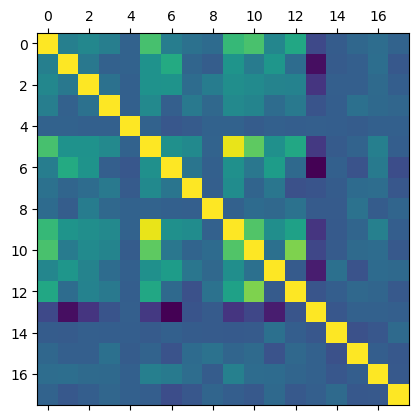

In [32]:
# Create a correlation heatmap using matplotlib

plt.matshow(df_rental.corr())
plt.show()

/var/folders/l2/7rhjv6b94rxchmxgsmwrbhr80000gn/T/ipykernel_11443/3754978208.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(df_rental.corr())


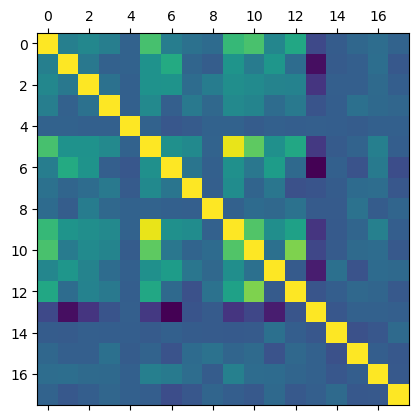

In [33]:
# Save figure
plt.matshow(df_rental.corr())
plt.savefig("out.png")

In [34]:
#current dir
cwd = os.getcwd()
cwd

'/Users/oluwaseunodusanya/Desktop/23.07.2023_Germany Apartment Rental Offer Analysis/03 Scripts'

/var/folders/l2/7rhjv6b94rxchmxgsmwrbhr80000gn/T/ipykernel_11443/4129096843.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(df_rental.corr(), fignum=f.number) # type of plot


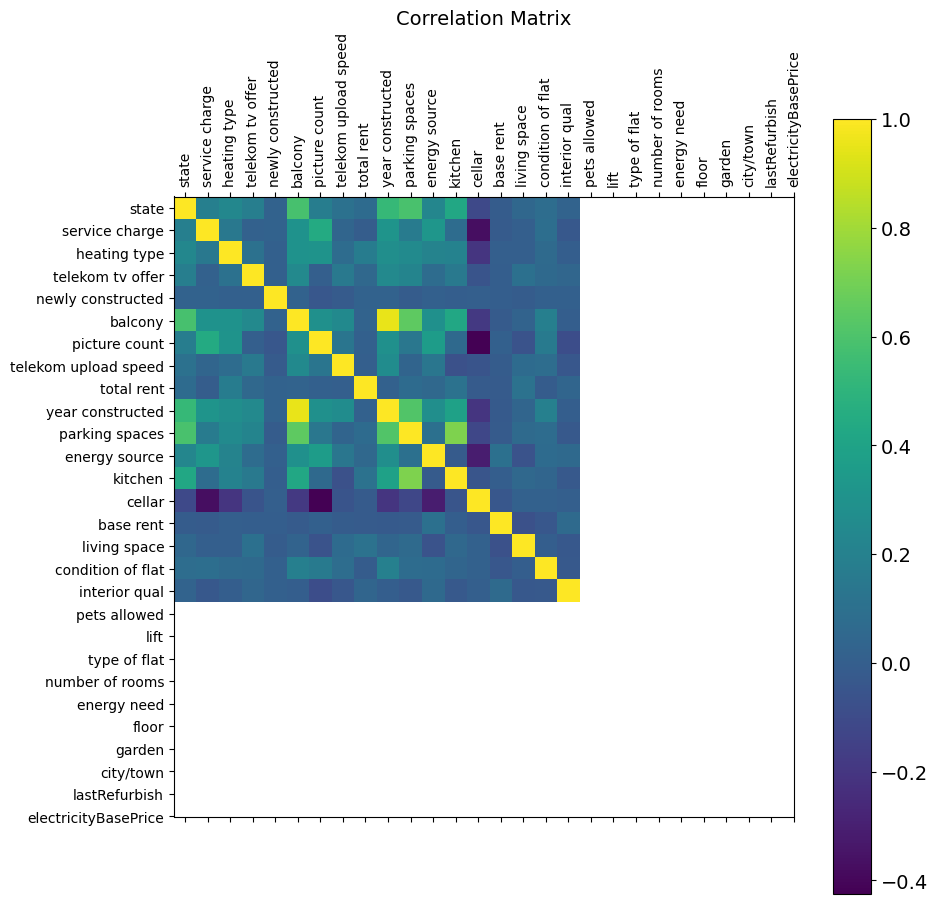

In [35]:
# add labels and a legend for the large correlation map

f = plt.figure(figsize=(10,10)) # figure size 
plt.matshow(df_rental.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_rental.shape[1]), df_rental.columns, fontsize=10, rotation=90) # x axis labels
plt.yticks(range(df_rental.shape[1]), df_rental.columns, fontsize=10) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title
plt.savefig("corr_rental.png")  #save

/var/folders/l2/7rhjv6b94rxchmxgsmwrbhr80000gn/T/ipykernel_11443/3326854798.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = sns.heatmap(df_rental.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to


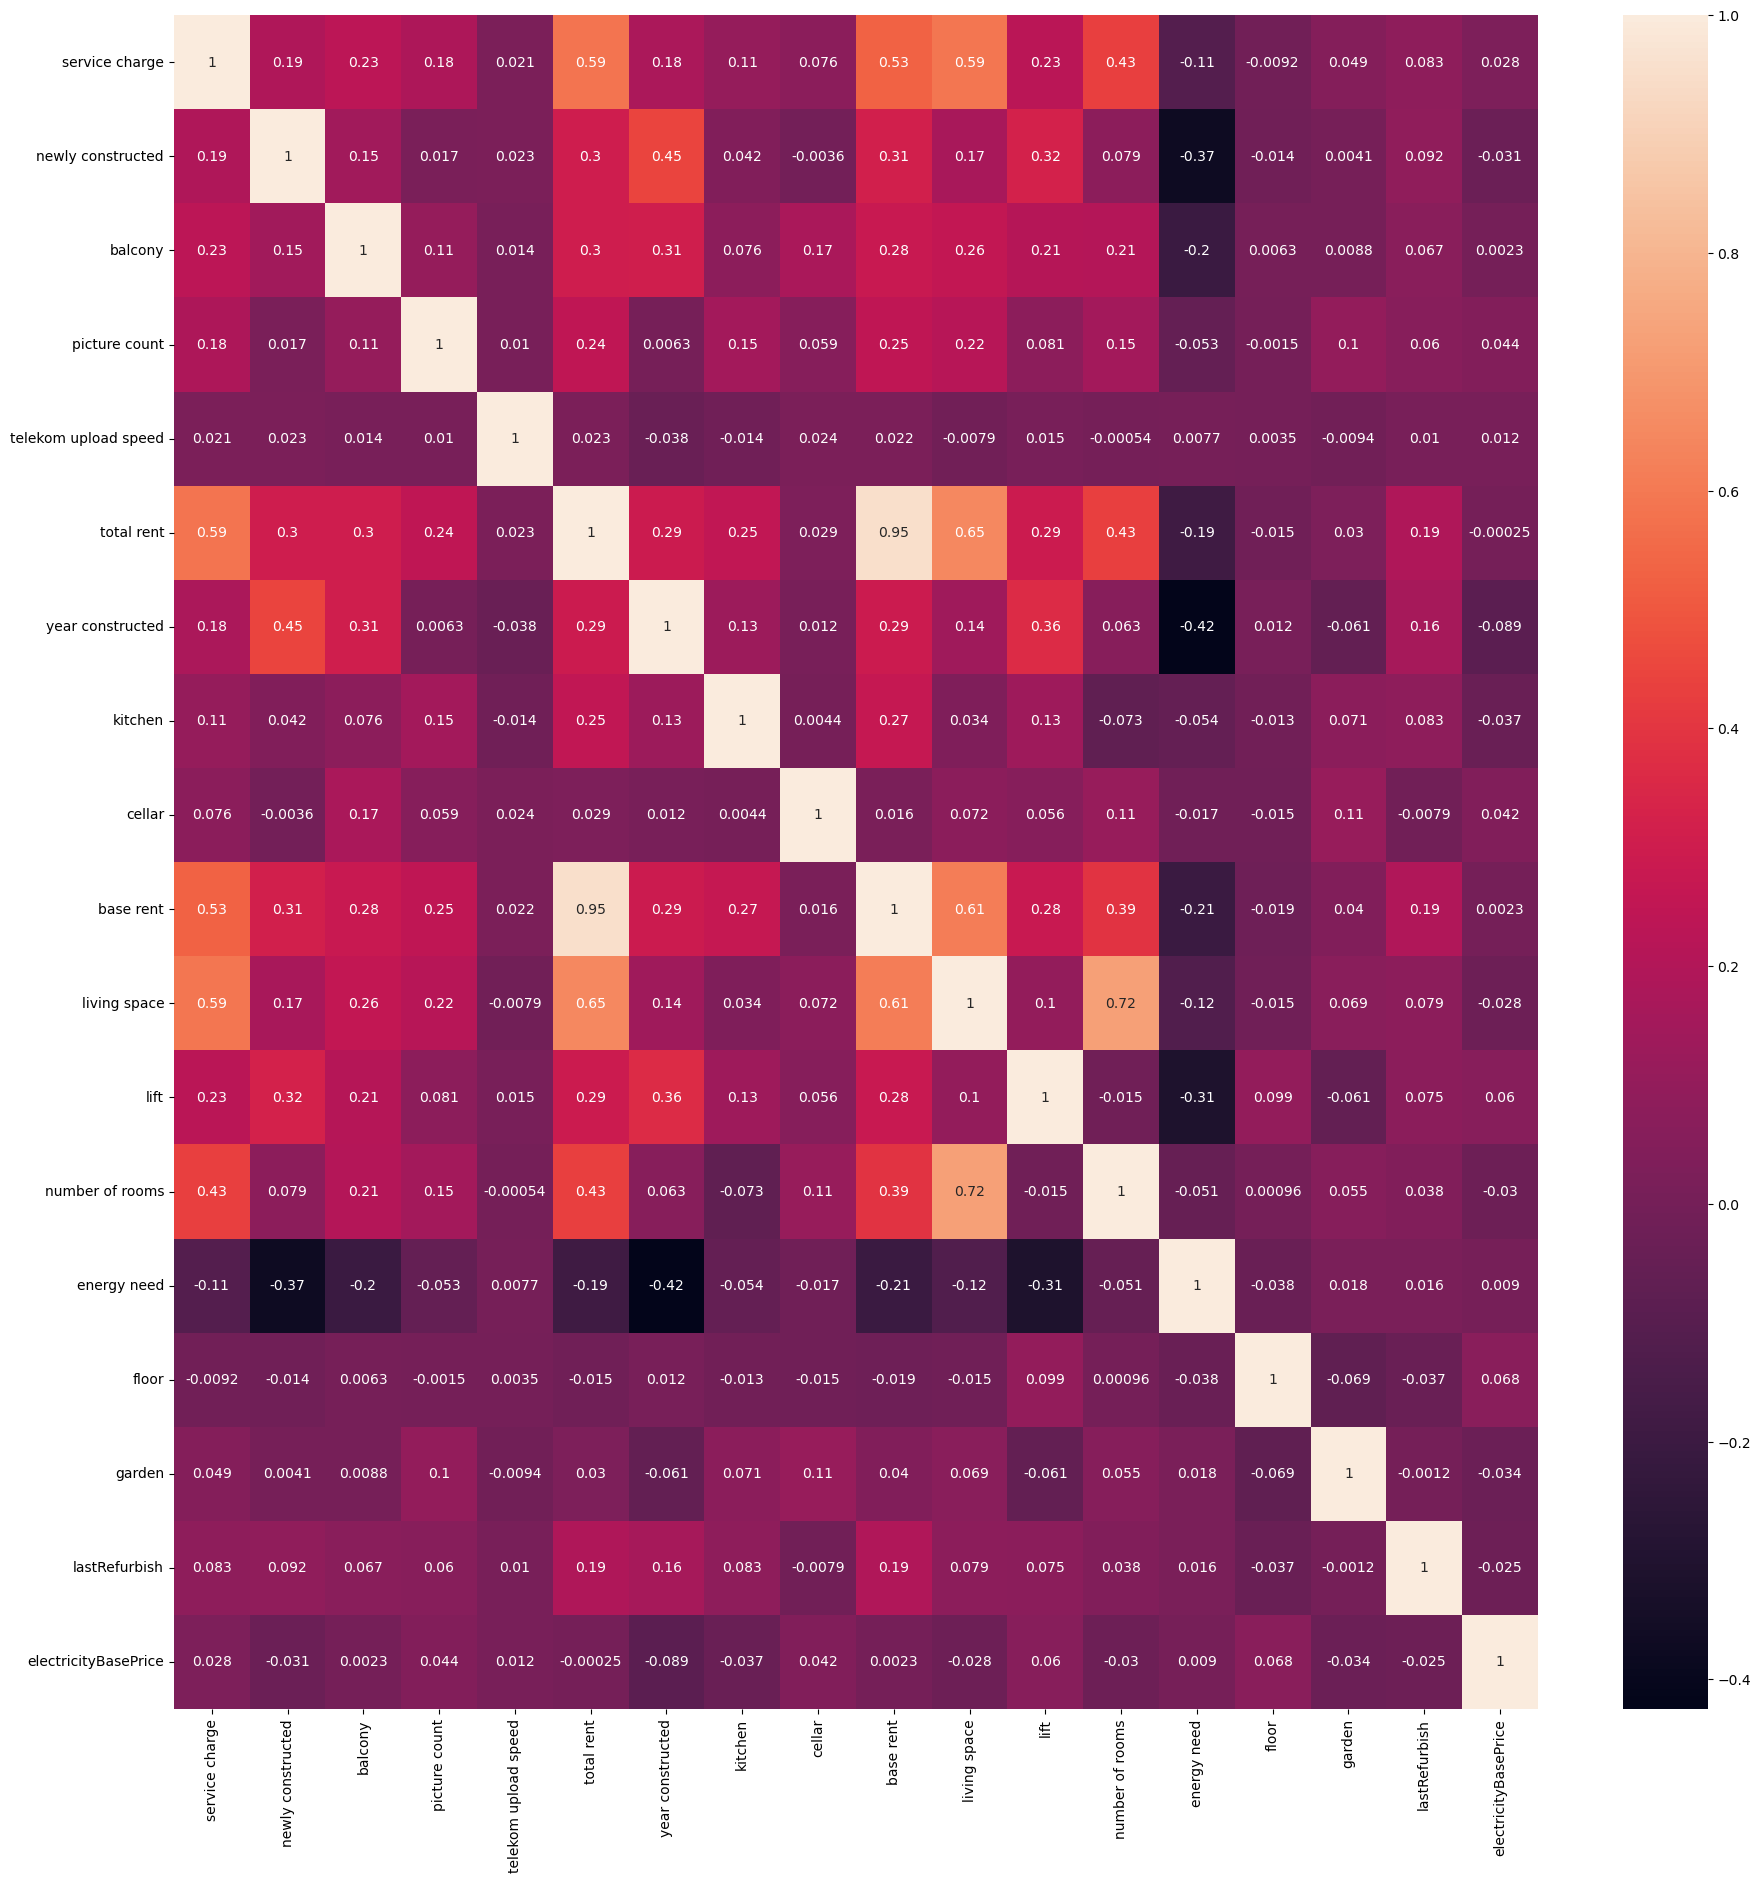

In [36]:
# To create correlation heatmap using seaborn
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(22,22))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_rental.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

### It is obvious from the plot that the total price and base price of apartments, which are the independent variable in the data set, are strongly correlated with service charge. Also the number of rooms and living space are strongly correlated with service charge. Number of rooms and living space are strongly correlated.  living space is strongly correlated with total rent and base rent. The most interesting and strongest correlation is seen between base rent and total rent. Other relationships ranges from positively weak correlation to negatively weak correlation

In [37]:
# To examine correlation between selected variable
selected_variables = ['service charge', 'picture count', 'base rent', 'total rent', 'living space', 'number of rooms']

In [38]:
df_selected_variables = df_rental[selected_variables]

In [39]:
df_selected_variables.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 265436 entries, 0 to 268849
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   service charge   258613 non-null  float64
 1   picture count    265436 non-null  float64
 2   base rent        265436 non-null  float64
 3   total rent       225419 non-null  float64
 4   living space     265436 non-null  float64
 5   number of rooms  265436 non-null  float64
dtypes: float64(6)
memory usage: 14.2 MB


In [40]:
df_selected_variables.corr()

service charge  picture count  base rent  total rent  \
service charge         1.000000       0.184374   0.530103    0.585185   
picture count          0.184374       1.000000   0.245297    0.243947   
base rent              0.530103       0.245297   1.000000    0.954677   
total rent             0.585185       0.243947   0.954677    1.000000   
living space           0.590218       0.220477   0.611263    0.646929   
number of rooms        0.430739       0.148861   0.388140    0.427311   

                 living space  number of rooms  
service charge       0.590218         0.430739  
picture count        0.220477         0.148861  
base rent            0.611263         0.388140  
total rent           0.646929         0.427311  
living space         1.000000         0.723885  
number of rooms      0.723885         1.000000

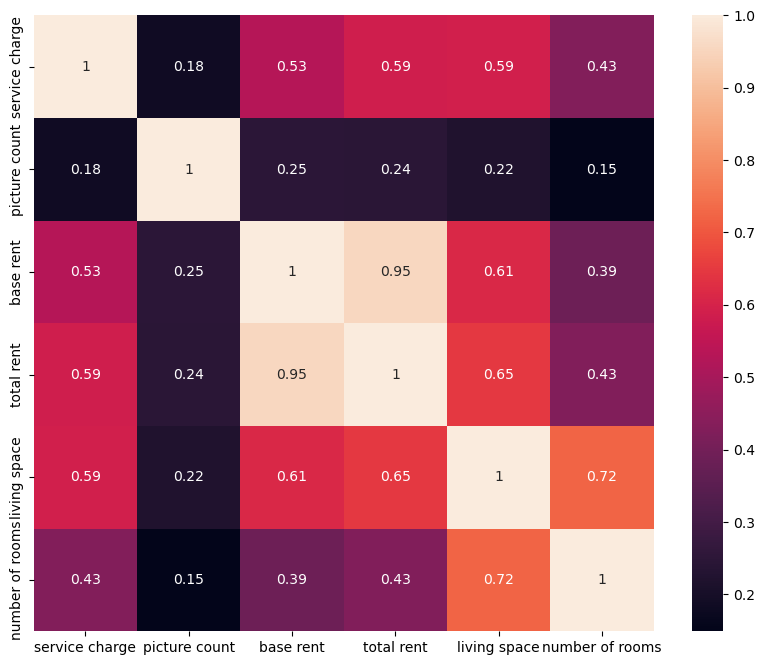

In [41]:
# To create correlation heatmap using seaborn
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,8))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_selected_variables.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

### Correlation matrix between the selected variables confirmed strong relationship between selected variables

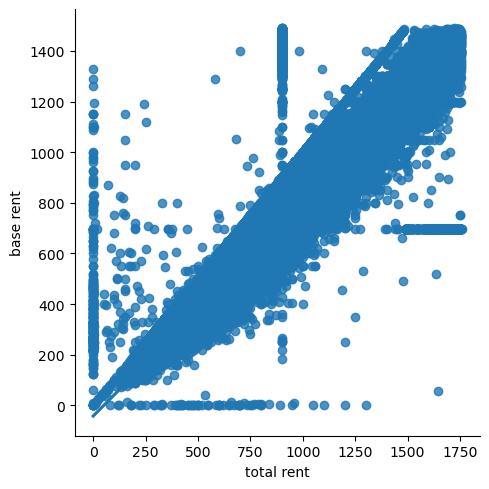

In [42]:
# Create a scatterplot for the "total rent" and "base rent" columns in seaborn

sns.lmplot(x = 'total rent', y = 'base rent', data = df_selected_variables)

### The plot confirmed the very strong relationship between the variables i.e the higher the base rent, the higher the total rent

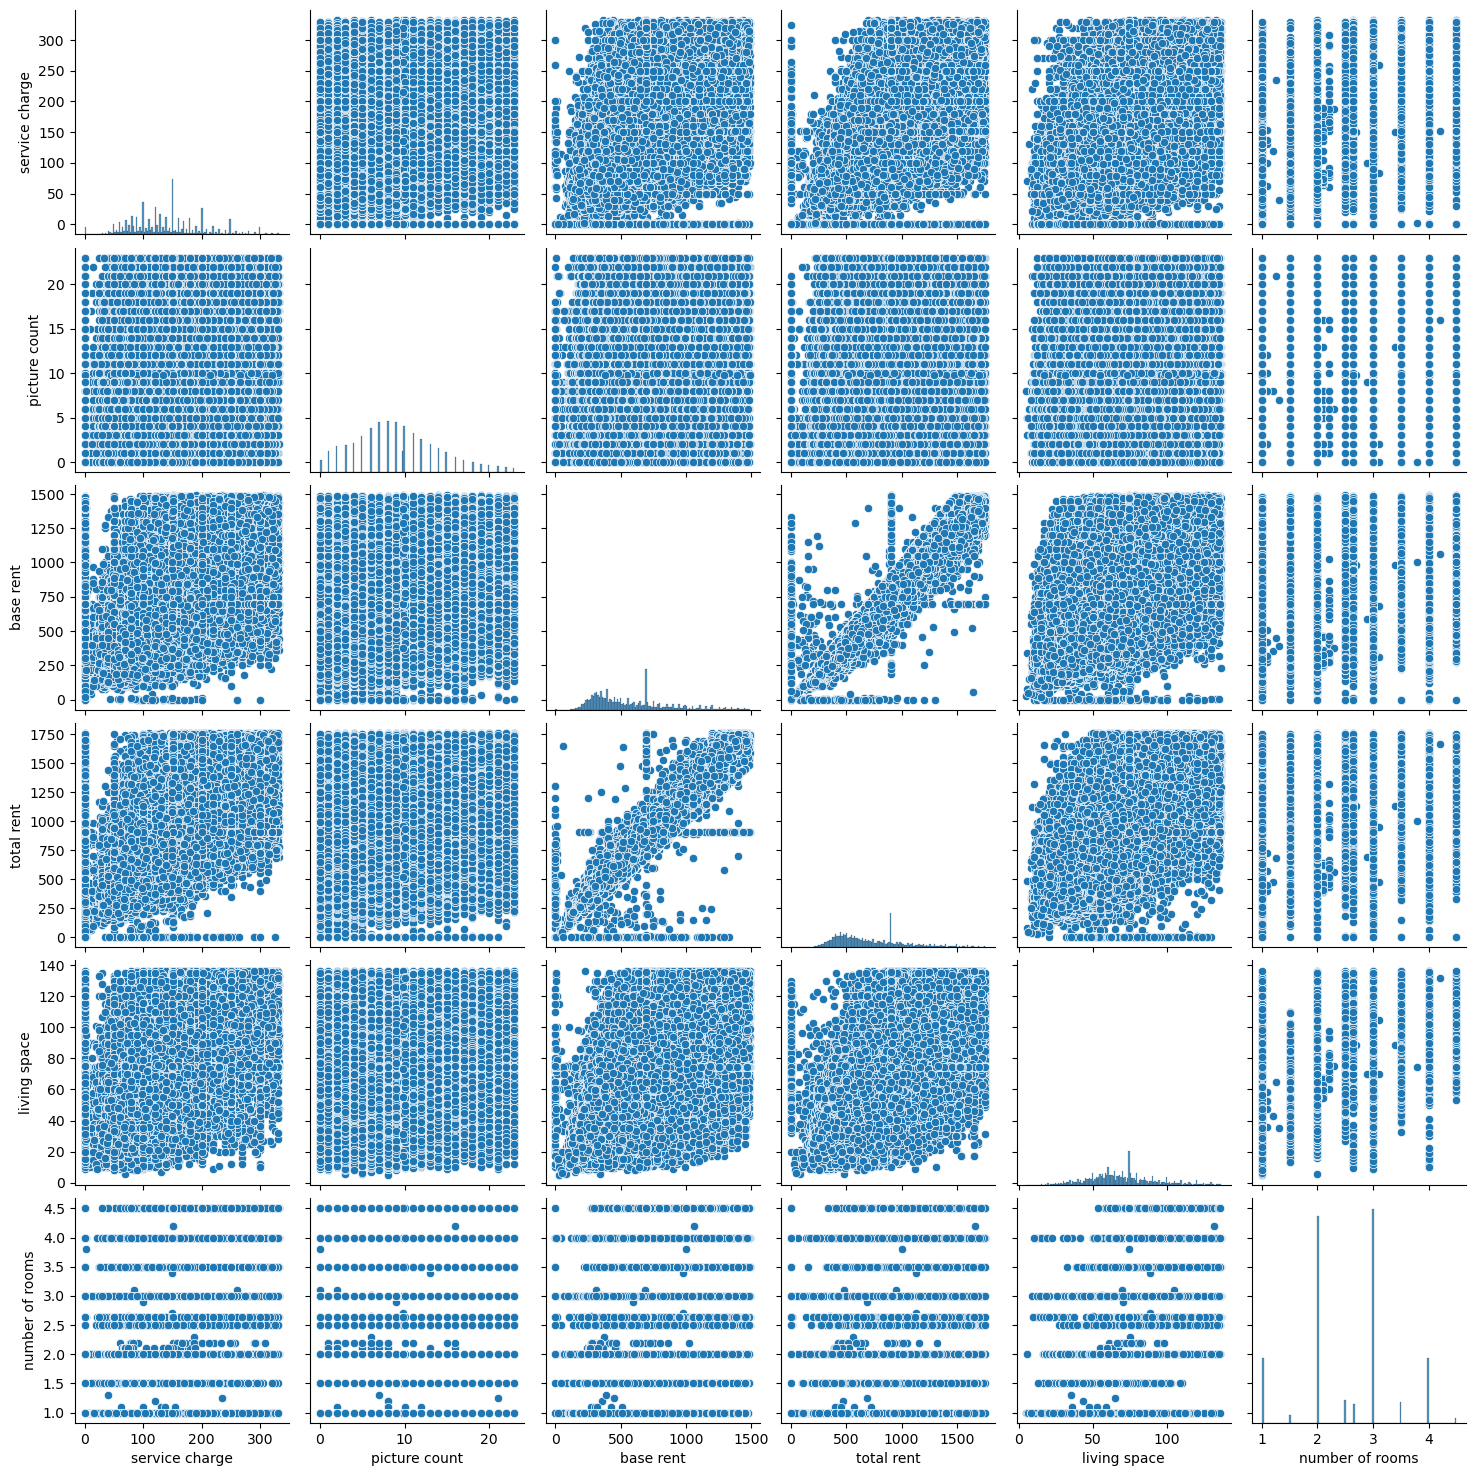

In [43]:
# Create a pair plot between the selected variables
g = sns.pairplot(df_selected_variables)

<Axes: xlabel='base rent', ylabel='Count'>

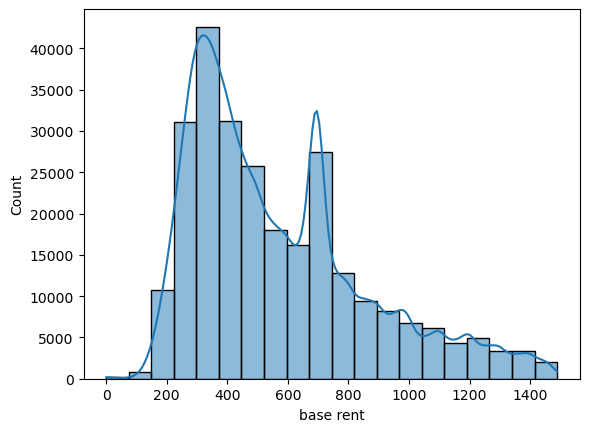

In [44]:
# To create categorical plot for variables using histogram to visualize the distribution of the variables(base rent)
sns.histplot(df_rental['base rent'], bins = 20, kde = True)

<Axes: xlabel='total rent', ylabel='Count'>

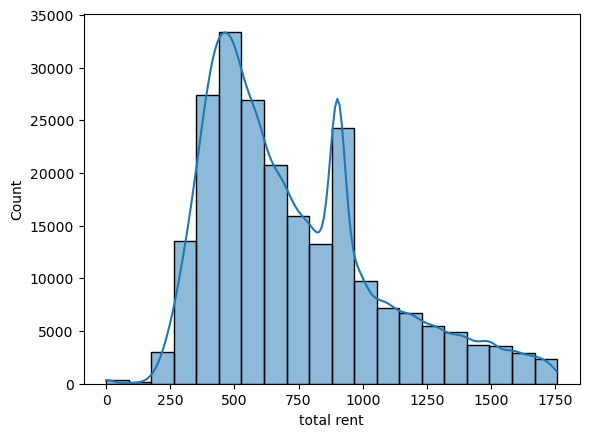

In [45]:
# To create categorical plot for variables using histogram to visualize the distribution of the variables(total rent)
sns.histplot(df_rental['total rent'], bins = 20, kde = True)

### Based on this, you can create the following categories for base rent:

“Low base rent” < 200
“Medium base rent” >= 200 and <700
“High base rent” >= 700

In [46]:
# To create categories for the base rent
df_rental.loc[df_rental['base rent'] < 200, 'base rent offer'] = 'Low base rent'

In [47]:
df_rental.loc[(df_rental['base rent'] >= 200) & (df_rental['base rent'] < 700), 'base rent offer'] = 'Middle base rent'

In [48]:
df_rental.loc[df_rental['base rent'] >= 700, 'base rent offer'] = 'High base rent'

In [49]:
df_rental['base rent offer'].value_counts(dropna = False)

Middle base rent    190227
High base rent       68881
Low base rent         6328
Name: base rent offer, dtype: int64

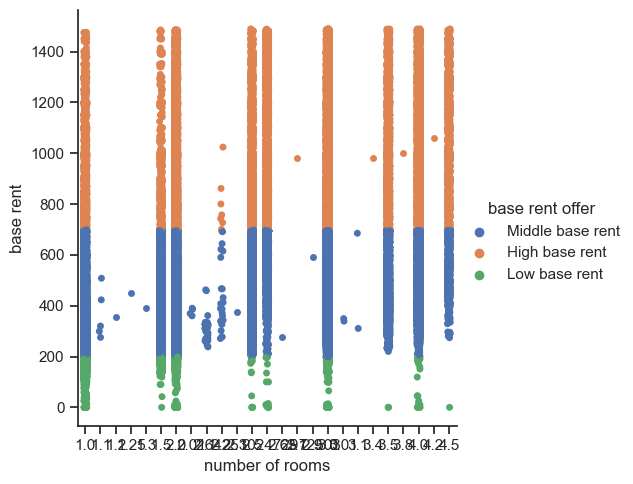

In [75]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="number of rooms", y="base rent", hue="base rent offer", data=df_rental)

In [75]:
# fig = g.get_figure()
g.savefig("out.png") 

# Again, the image will be saved in the working directory. 

### The plot indicates that the three categories of base rents is seen across the different number of rooms. Some low base rents are found in apartments with high room numbers. 

### Based on this, you can create the following categories for total rent:

“Low rental offer” < 300
“Medium rental offer” >= 300 and <900
“High rental offer” >= 900

In [67]:
# To create categories for the rental offer
df_rental.loc[df_rental['total rent'] < 300, 'rental offer'] = 'Low rental offer'

In [68]:
df_rental.loc[(df_rental['total rent'] >= 300) & (df_rental['total rent'] < 900), 'rental offer'] = 'Middle rental offer'

In [69]:
df_rental.loc[df_rental['total rent'] >= 900, 'rental offer'] = 'High rental offer'

In [71]:
df_rental['rental offer'].value_counts()

Middle rental offer    150624
High rental offer       67624
Low rental offer         7171
Name: rental offer, dtype: int64

## Analysis Questions
** How stable is the rental market in Germany? Rental market fluctuates in Germany
** What are the major factors that determine the rental offer of apartments in Germany? service charge, base rent, number of rooms, living space.
** How have rental prices in Germany evolved over time on the selected dates?
** Which states/cities in Germany offer more expensive rents than the others?
** Is there a correlation between the size of the city or urban center and rental prices in Germany?  
** Can external factors, such as inflation or population growth be correlated with the observed rental market trends during the selected time frames?   

## Initial Hypothesis
Rental prices have consistently increased across Germany during the selected dates.
Major cities and urban centers will exhibit the highest rental prices compared to smaller towns and rural regions.

## Additional Hypothesis
The higher the base rent offer of an apartment, the higher the total rental offer